# Comparison results
This notebook contains the analysis of the sample recycle fuel cycle to compare the 
Cycamore Reactor and OpenMCyclus DepleteReactor. The two archetypes are compared 
against the amount of each fuel type received, mass of spent fuel discharged, and 
the mass of separated plutonium. 

The Cycamore Reactor is used twice (creating three different scenarios), with the 
`decom_transmute_all` setting toggled between `True` and `False`.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 

sys.path.append("../../transition-scenarios/scripts")
import dataframe_analysis as dfa
import output_metrics as oup

In [44]:
files = {'cycamore':'cycamore_recycle.sqlite',
        'cycamore_decom_transmute_all':'cycamore_recycle_decom_transmute_all.sqlite',
        'openmcyclus_recycle':'openmcyclus_recycle.sqlite'}
lines = {'cycamore':'-',
        'cycamore_decom_transmute_all':'--',
        'openmcyclus_recycle':(0,(5,10))}

In [45]:
transactions = {}
uox = {}
mox = {}
spent_uox = {}
spent_mox = {}
separated_pu = {}
power = {}
for key in files:#['cycamore','cycamore_decom_transmute_all']:
    transactions[key] = oup.add_receiver_prototype(files[key])
    uox[key] = dfa.commodity_to_prototype(transactions[key], 'uox', 'Reactor')
    mox[key] = dfa.commodity_to_prototype(transactions[key], 'mox', 'Reactor')
    spent_uox[key] = dfa.commodity_to_prototype(transactions[key], 'spent_uox', 'Separations')
    spent_mox[key] = dfa.commodity_to_prototype(transactions[key], 'spent_mox', 'Repository')
    separated_pu[key] = dfa.commodity_to_prototype(transactions[key], 'separated_pu', 'FuelFab')
    power[key] = oup.get_prototype_energy(files[key], 'Reactor')

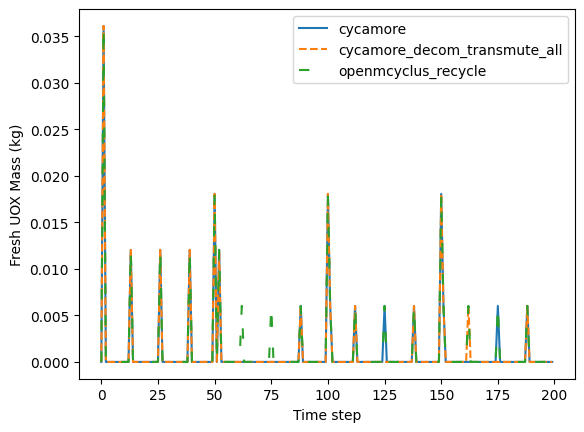

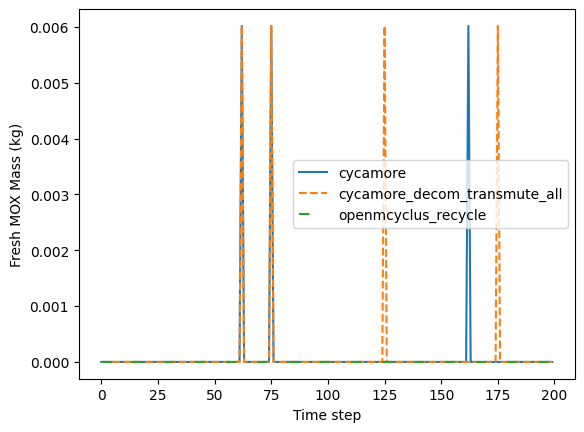

In [48]:
# Fuel masses
plt.figure()
for key in files:
    plt.plot(uox[key]['Time'][0:200], uox[key]['Quantity'][0:200], label=key,
            linestyle=lines[key])
plt.xlabel("Time step")
plt.ylabel("Fresh UOX Mass (kg)")
plt.legend()

plt.figure()
for key in files:
    plt.plot(mox[key]['Time'][0:200], mox[key]['Quantity'][0:200], label=key,
            linestyle=lines[key])
plt.xlabel("Time step")
plt.ylabel("Fresh MOX Mass (kg)")
plt.legend()

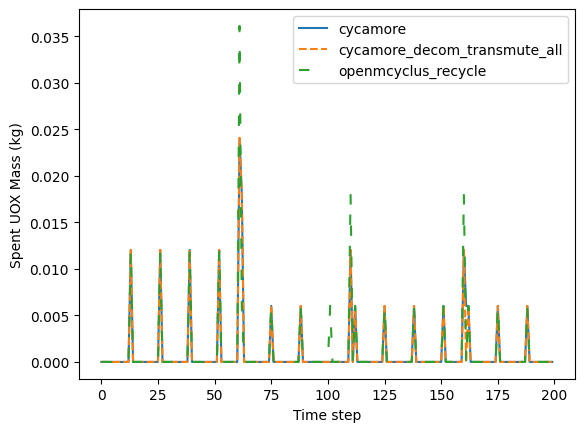

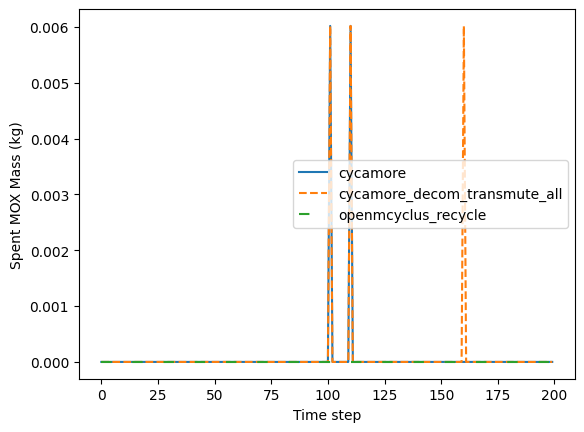

In [49]:
#Spent fuel masses
plt.figure()
for key in files:
    plt.plot(spent_uox[key]['Time'][0:200], spent_uox[key]['Quantity'][0:200], label=key,
            linestyle=lines[key])
plt.xlabel("Time step")
plt.ylabel("Spent UOX Mass (kg)")
plt.legend()

plt.figure()
for key in files:
    plt.plot(spent_mox[key]['Time'][0:200], spent_mox[key]['Quantity'][0:200], label=key,
            linestyle=lines[key])
plt.xlabel("Time step")
plt.ylabel("Spent MOX Mass (kg)")
plt.legend()

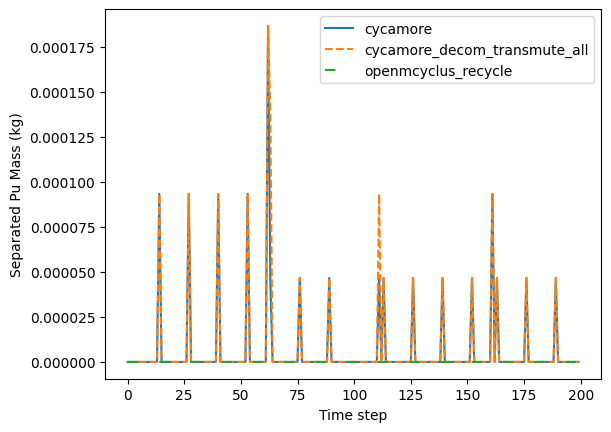

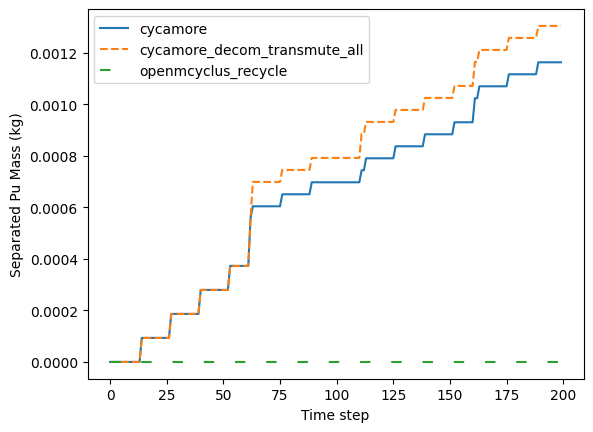

In [50]:
# Separated Pu mass
plt.figure()
for key in files:
    plt.plot(separated_pu[key]['Time'][0:200], separated_pu[key]['Quantity'][0:200], label=key,
            linestyle=lines[key])
plt.xlabel("Time step")
plt.ylabel("Separated Pu Mass (kg)")
plt.legend()

plt.figure()
for key in files:
    plt.plot(separated_pu[key]['Time'][0:200], separated_pu[key]['Quantity'].cumsum()[0:200], label=key,
            linestyle=lines[key])
plt.xlabel("Time step")
plt.ylabel("Separated Pu Mass (kg)")
plt.legend()

In [37]:
energy = {}
for key in files:
    ene = oup.get_table_from_output(files[key], "TimeSeriesPower")
    indexes = ['SimId','Time']
    ene = ene.groupby(indexes).sum()
    energy[key] = ene.reset_index()

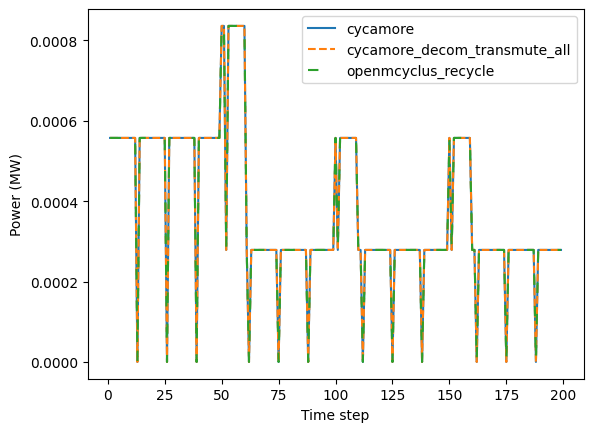

In [38]:
for key in files:
    plt.plot(energy[key]['Time'], energy[key]['Value'], label=key, linestyle=lines[key])
plt.xlabel("Time step")
plt.ylabel("Power (MW)")
plt.legend()